In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__) # I used tf 1.8.0


Using TensorFlow backend.


1.8.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print (train_images.shape) # Pay attention to this and test_images shape, 
print (len(train_labels))  # convolution layers doesn`t work with 
print (test_images.shape)  # kind of shape.
print (len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


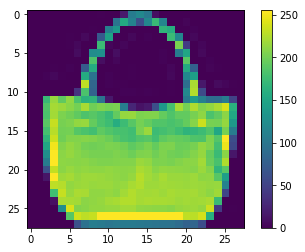

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()


In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

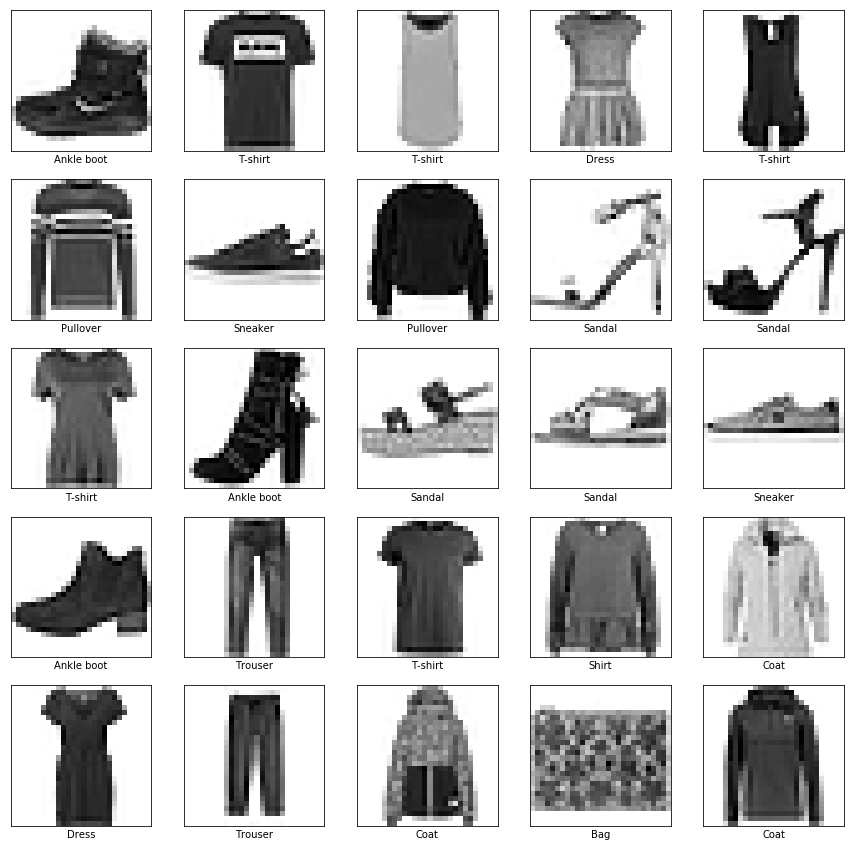

In [7]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential([
    
    keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(128, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(256, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax")
])



In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
train_images=train_images.reshape(60000,28,28,1) # Yep, reshape input data for
test_images=test_images.reshape(10000,28,28,1)   # convolution layers

test_labels1=to_categorical(test_labels)
train_labels1=to_categorical(train_labels)

In [11]:
# Using for save weights of network 
ckpoint_path = "save_weights/"
if not os.path.exists(ckpoint_path):
    os.mkdir(ckpoint_path)
else:    
    pass
ckpoint_dir = os.path.dirname(ckpoint_path)
ckpoint_path+='cp0.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [12]:
#model.fit(train_images, train_labels, epochs=10)
history = model.fit(train_images, 
                    train_labels,  
                    epochs=10,
                    validation_data=(test_images,test_labels),
                    callbacks=[cp_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.7341 - acc: 0.7327 - val_loss: 0.4741 - val_acc: 0.8221

Epoch 00001: saving model to save_weights/cp0.ckpt
Epoch 2/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.4555 - acc: 0.8404 - val_loss: 0.3867 - val_acc: 0.8605

Epoch 00002: saving model to save_weights/cp0.ckpt
Epoch 3/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.3827 - acc: 0.8664 - val_loss: 0.3627 - val_acc: 0.8693

Epoch 00003: saving model to save_weights/cp0.ckpt
Epoch 4/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.3393 - acc: 0.8806 - val_loss: 0.3390 - val_acc: 0.8740

Epoch 00004: saving model to save_weights/cp0.ckpt
Epoch 5/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.3097 - acc: 0.8911 - val_loss: 0.3175 - val_acc: 0.8855

Epoch 00005: saving model to save_weights/cp0.

In [13]:
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

Untrained model, accuracy: 89.20%


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

In [15]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' + metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_' + metric])
  plt.show()

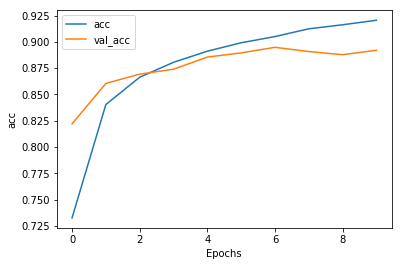

In [16]:
plot_graphs(history, 'acc')

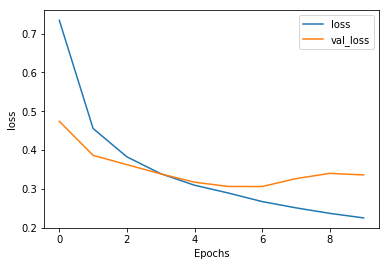

In [17]:
plot_graphs(history, 'loss')

In [18]:
predictions = model.predict(test_images)
print (np.argmax(predictions[0]))
print (test_labels[0])

9
9


In [19]:
train_images=train_images.reshape(60000,28,28)
test_images=test_images.reshape(10000,28,28)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


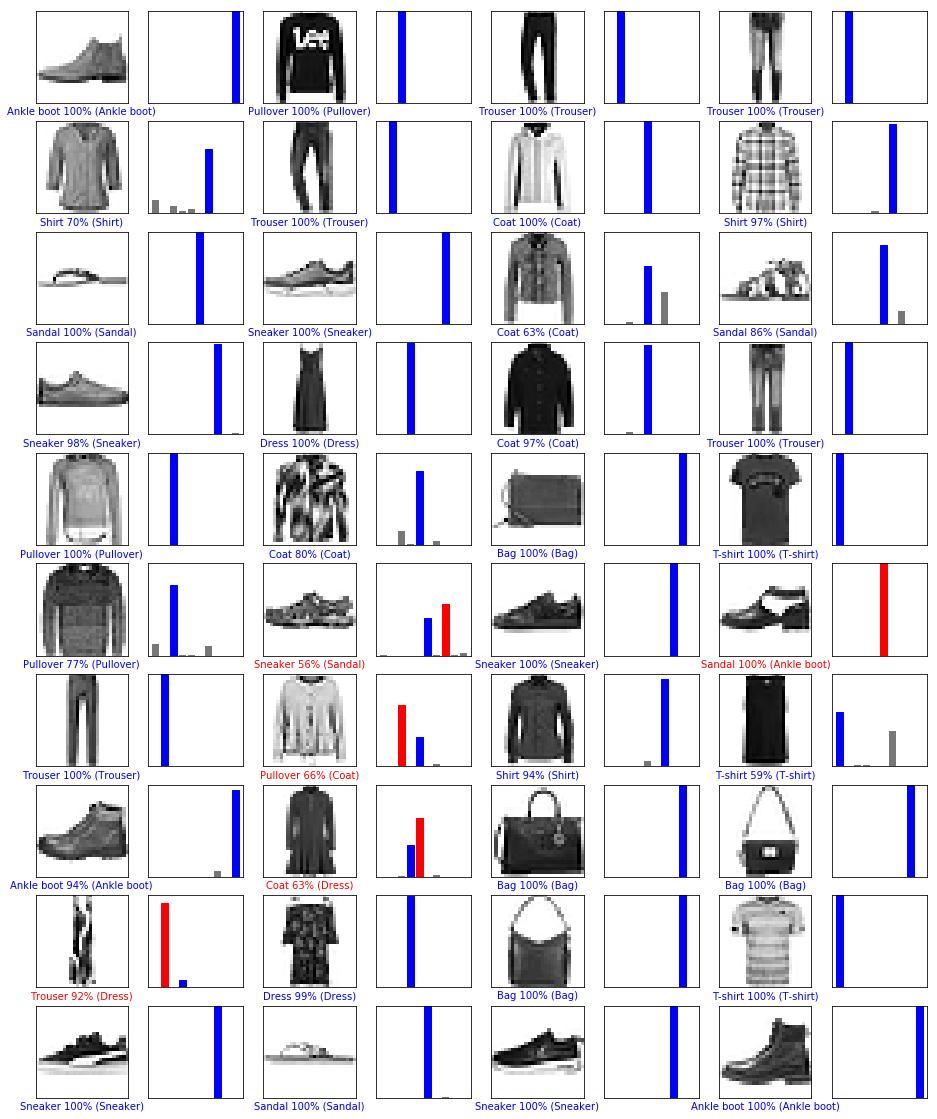

In [20]:
num_rows = 10
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [21]:
# loading weights
# model.load_weights(ckpoint_path)